# **Python을 이용한 해양데이터 활용 실습**

## 학습목표
  1. 해양관측데이터란 무엇이고 수집하는 방법을 알 수 있다.
  2. python을 이용하여 우리나라 해저지형도를 만들 수 있다.
  3. OpenAPI를 이용하여 실시간 해양정보를 활용할 수 있다.

# 해양관측데이터의 개요와 대표적인 웹사이트

<div style ="text-align:center">
<img src="https://tos.org/oceanography/assets/images/content/oceanObs2021-morris-f3.jpg" height="300px" >
<img src="https://cdn.ioos.noaa.gov/media/2017/12/global-ocean-observing-system-for-climate.jpg" height="300", align="right">
</div>

> 해외
- WOD
- BODC
- Copernicus

> 국내
- 국립해양조사원
- 기상청
- 국립수산과학원
- 해양환경공단
- JOISS

# Markdwon
> ### 참고자료
- https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Cheat_sheet_for_Google_Colab.ipynb
- https://colab.research.google.com/notebooks/markdown_guide.ipynb

# Google Earth Engine 소개

### <font color="grey;">GEE는 지리공간데이터 분석 및 시각화 플랫폼으로써 위성영상 및 40년 이상의 지구관측이미지 데이터와 함께 학술, 영리 및 비영리, 공공에 서비스</font>
- 개방 데이터 카탈로그, 병렬계산 컴퓨팅 인프라, 지리공간API, 인터랙티브 앱 서버 제공

### Google Earth와 무엇이 다른가?
- 구글어스는 가상지구본을 통한 세계 탐색 도구인 반면, 어스엔진은 지리공간데이터 분석 도구

# GEEMAP

<div style ="text-align:center">
<img src="https://www.kdnuggets.com/wp-content/uploads/anello_geospatial_data_analysis_geemap_1.png" height="300px" >
</div>


##### 참고문헌
Wu, Q., (2020). geemap: A Python package for interactive mapping with Google Earth Engine. The Journal of Open Source Software, 5(51), 2305. https://doi.org/10.21105/joss.02305

# Earth Engine Python API Colab Setup


## API 불러오기(import)와 토큰 인증

EE API는 Colab에 기본 설치되므로 불러오기와 인증단계만을 요구함. Colab 커널을 재시작하거나 Colab 가상머신이 비활성화로 인해 재시작하는 경우에도 이 단계를 거쳐야 함.

### API 불러오기


In [1]:
import ee

### Authenticate and initialize

- `ee.Authenticate` 함수 실행: Earth Engine 서버 접속을 승인하기 위함
- `ee.Initialize` : 초기화
- 이 단계를 거치면 Earth Engine에 Google 계정 액세스 권한을 부여하라는 메시지가 표시되며 셀에 인쇄된 지침을 따름

In [3]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='ee-haebom')

# GEE 기초
- GEE 둘러보기
  - GEE Code Editor
  - GEE Data Catalog
- GEE 객체
  - ee.Image
  - ee.ImageCollection
  - ee.Feature
  - ee.FeatureCollection
  - ee.Geometry
- 실습: 한반도 상공의 Landsat 위성이미지 찾기

## Test the API

Test the API by printing the elevation of Mount Everest.

In [ ]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


## Map visualization


### Interactive map

[geemap](https://github.com/gee-community/geemap) 라이브러리를 사용하여 ee.Image 객체를 대화형 [ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet) 맵에 표시해자.

In [4]:
%pip install -U geemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.0 MB/s eta 0:00:00


In [5]:
import geemap

In [8]:


# 부산의 좌표(128.9697, 35.1796)를 Geometry 포인트로 생성하여 관심지역(roi: region of interest)으로 설정한다.
roi = ee.Geometry.Point(128.9697, 35.1796)

# GEE 카탈로그에 있는 Landsat-9 콜력션(LANDSAT/LC09/C02/T1_TOA) 이용
# 날짜로 영상 필터(filterDate) : 2022-01-01와 2022-12-01 사이
# 지역(영역) 필터(filterBounds)
# 구름 필터
landsat9 = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA')

l9filter= landsat9.filterDate(
    '2022-01-01', '2022-12-01').filterBounds(roi).filter(ee.Filter.lt('CLOUD_COVER', 10))

# True Color 영상합성을 위해 RGB밴드(B4, B3, B2) 선택 후 이들 영상 중 첫 영상(first)을 선택하여 trueColor432 변수에 할당
trueColor432 = l9filter.select(['B4', 'B3', 'B2']).first();

# 시각화
trueColor432Vis = {
  'min': 0.0,
  'max': 0.4,
};

# Map 인스턴스 생성
m = geemap.Map()

# 관심지역(roi)으로 map 이동 및 확대(8)
m.centerObject(roi, 8)

# trueColor432 영상을 레이어로 추가
m.add_layer(trueColor432, trueColor432Vis, 'True Color (432)')
m

Map(center=[35.1796, 128.9697], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

In [ ]:
# Import the geemap library.
import geemap
import geemap.colormaps as cm

eez = ee.FeatureCollection("projects/ee-haebom/assets/kr_eez")
gebco_grid = ee.ImageCollection("projects/sat-io/open-datasets/gebco/gebco_grid")
gebco_grid_ocean = gebco_grid.median().updateMask(gebco_grid.median().lt(0))

dataset = ee.Image('NOAA/NGDC/ETOPO1');
elevation = dataset.select('bedrock');
elevation = elevation.updateMask(elevation.lt(0));

# Set visualization parameters.
elevationVis = {
  'min': -7000.0,
  'max': 0.0,
  'palette': cm.palettes.gist_earth }

#["#4C00FFFF", "#0019FFFF", "#0080FFFF", "#00E5FFFF", "#00FF4DFF", "#4DFF00FF", "#E6FF00FF", "#FFFF00FF", "#FFDE59FF", "#FFE0B3FF"]

# Create a map object.
Map = geemap.Map(center=[37, 129], zoom=7)

# Add the elevation model to the map object.
Map.addLayer(elevation, elevationVis, 'Elevation')
Map.addLayer(eez, {}, 'eez')

# Display the map.
display(Map)


Map(center=[37, 129], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(chi…

In [ ]:

# 등수심선(contour lines) 생성 함수
def contour_f(line):
  binary_contour = elevation.convolve(ee.Kernel.gaussian(7, 5)).subtract(ee.Image.constant(line)).zeroCrossing()
  return binary_contour.multiply(ee.Image.constant(line)).toFloat().mask(binary_contour)

lines = ee.List.sequence(-4000, 0, 40)
contourlines = lines.map(contour_f)
contourlines = ee.ImageCollection(contourlines).mosaic()
contourlines = contourlines.clip(eez);

# Add a layer to show the contour lines
Map.addLayer(contourlines, {'min': -4000, 'max': 0, 'palette': cm.palettes.gist_earth_r}, 'contours') #['00ff00', 'ff0000']


# 우리나라 관할해역(EEZ)에서 가장 깊은 곳의 좌표와 수심을 찾아보자
- Reducer 사용 : Reducer는 어스엔진에서 시간, 공간, 밴드, 배열과 같이 각각의 구조화된 데이터를 집계하는 함수
  - reduceRegion()
  - ee.Reducer.min()

- 좌표를 geemap의 maker를 이용하여 지도 상에 표시하기

In [ ]:

lonLatImage = ee.Image.pixelLonLat();
imageWithLonLat = elevation.addBands(lonLatImage);

stats = imageWithLonLat.reduceRegion(
    reducer=ee.Reducer.min(3),
    geometry=eez,
    scale=1000,
    crs= 'EPSG:4326',  # California Albers projection
)

print(stats.getInfo())

df = stats.getInfo()['min']
x = stats.getInfo()['min1']
y = stats.getInfo()['min2']
Map.add_marker(
    [y, x],
    shape="circle",
    radius=20,
    color="red",
    fill_color="#3388ff",
    fill_opacity=0.5,
)
Map


{'min': -3427, 'min1': 131.11360729366476, 'min2': 38.81171185038393}


Map(bottom=3538.0, center=[35.24561909420681, 146.66748046875003], controls=(WidgetControl(options=['position'…

# 왜 해저지형이 필요한가, 어떻게 조사하나
- 참고자료: [국가해양기본도](https://blog.naver.com/koreamof/221913422494)

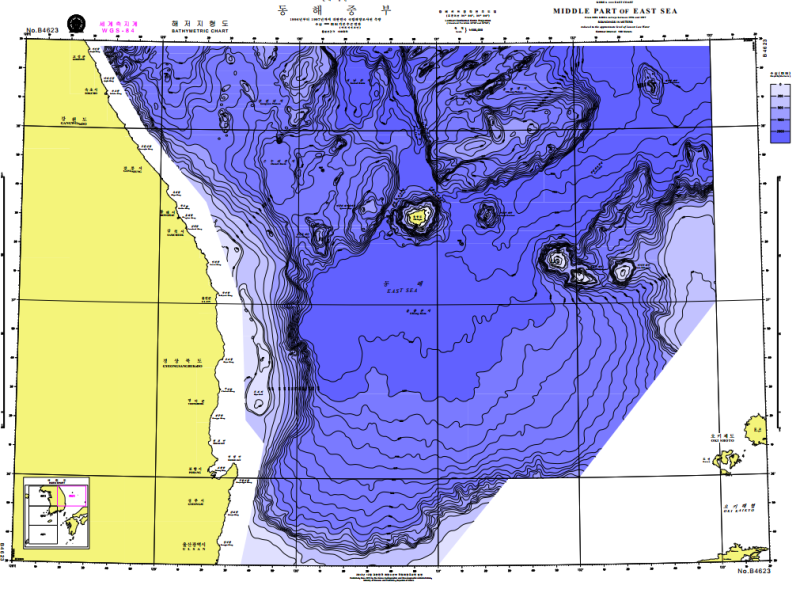




![chart2](https://github.com/Marino89/teacher_training/blob/main/bathy_chart.png?raw=true)